In [1]:
import numpy as np

In [37]:
## 定义模型
class Perceptron:
    def __init__(self, X_data, Y_data):
        self.X_data = X_data
        self.Y_data = Y_data
        self.w = np.zeros(X_data.shape[1])
        self.b = 0
        self.l_rate = 0.1
        
    def fit(self):
        tag = True
        while tag:
            count = 0
            for i in range(len(self.X_data)):
                x = self.X_data[i]
                y = self.Y_data[i]
                if y * (np.dot(x, self.w) + self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y,x)
                    self.b = self.b + self.l_rate * y
                    count += 1
            if count == 0:
                tag = False
        return ("训练结束！")          

In [15]:
# 利用鸢尾花测试。
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [16]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]

In [20]:
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


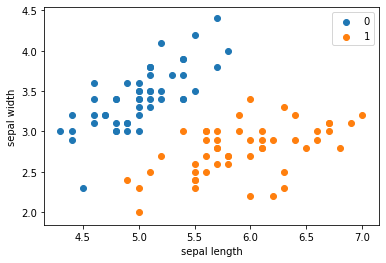

In [22]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [26]:
data = df.iloc[:100, [0, 1, -1]].values

In [28]:
X_data,Y_data = data[:,:-1], data[:,-1]

In [29]:
Y_data = np.array([1 if i == 1 else -1 for i in Y_data])

In [33]:
Model = Perceptron(X_data, Y_data)

In [34]:
Model.fit()

'训练结束！'

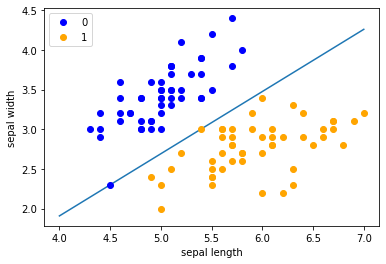

In [35]:
x_points = np.linspace(4, 7, 10)
y_ = -(Model.w[0] * x_points + Model.b) / Model.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## 对偶形式还未完成。